In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
trees15 = pd.read_csv('../data/tree_census/NYC_Street_Tree_Census_2015.csv')
# source: https://data.world/johnsnowlabs/nyc-street-tree-census-2015
trees05 = pd.read_csv('../data/tree_census/2005_Street_Tree_Census.csv', low_memory=False)
# source: https://data.cityofnewyork.us/Environment/2005-Street-Tree-Census/29bw-z7pj

### 2015 Tree Census

In [160]:
trees15.columns

Index(['Tree_ID', 'Block_ID', 'Created_Date', 'Tree_Diameter',
       'Diameter_of_Stump_Measured', 'Curb_Location', 'Tree_Status',
       'Tree_Health', 'Scientific_Name', 'Common_Name', 'Signs_of_Stewardship',
       'Guards_Condition', 'Sidewalk_Condition', 'User_Type', 'Problems',
       'Is_Root_Stone_Present', 'Is_Root_Gate_Present',
       'Is_Root_Other_Present', 'Is_Trunk_Wire_Present',
       'Is_Trunk_Light_Present', 'Is_Trunk_Other_Present',
       'Is_Branch_Light_Present', 'Is_Branch_Sneaker_Present',
       'Is_Branch_Other_Present', 'Estimated_Address', 'Zip_Code', 'City',
       'Community_Board', 'Borough', 'Council_District',
       'State_Assembly_District', 'State_Senate_District', 'NTA_Code',
       'NTA_Name', 'Borough_CT', 'Latitude', 'Longitude', 'Census_Tract',
       'BIN', 'BBL'],
      dtype='object')

In [20]:
# Identify groups of cols in case useful; drop unnecessary columns

is_cols = ['Is_Root_Stone_Present', 'Is_Root_Gate_Present', 'Is_Root_Other_Present', 'Is_Trunk_Wire_Present', 'Is_Trunk_Light_Present', 'Is_Trunk_Other_Present', 
           'Is_Branch_Light_Present', 'Is_Branch_Sneaker_Present', 'Is_Branch_Other_Present']

trees15.drop(columns=['Tree_ID', 'Block_ID','Curb_Location', 'Signs_of_Stewardship', 'Guards_Condition', #'User_Type', 
                      'Problems', 'City', 'Community_Board', 'State_Assembly_District', 
           'State_Senate_District', 'NTA_Code', 'Census_Tract', 'BIN', 'BBL'],inplace=True)

In [21]:
trees15.rename(columns={
    'Created_Date': 'year',
    'Tree_Diameter': 'tree_diameter',
    'Diameter_of_Stump Measured': 'stump_diameter',
    'Scientific_Name': 'spc_latin',
    'Common_Name': 'spc_common',
    'Sidewalk_Condition': 'sidw_damage',
    'Estimated_Address':'est_address',
    'Tree_Status': 'tree_status',
    'Tree_Health': 'tree_health_subjective',
    'Zip_Code': 'zip_code',
    'NTA_Name': 'nta_name',
    'Latitude': 'latitude', 
    'Longitude': 'longitude',
    'Borough': 'borough',
    'Council_District': 'council_district',
    'Borough_CT': 'census_tract_7dig'
}, inplace=True)

In [22]:
boro_dict = {1: 'Manhattan',
             2: 'Bronx',
             3: 'Brooklyn',
             4: 'Queens',
             5: 'Staten Island'
            }

trees15['borough_name'] = trees15['borough'].map(boro_dict)


In [23]:
trees15['tree_status'].value_counts()

Alive    542116
Stump     14988
Dead      11318
Name: tree_status, dtype: int64

In [24]:
# Map categorical columns to numerical values

trees15['alive'] = trees15['tree_status'].map({'Alive': 1, 'Dead': 0, 'Stump': 0})
#trees15['tree_status'] = trees15['tree_status'].map({'Alive': 2, 'Dead': 0, 'Stump': 0})
trees15['year'] = 2015
trees15['sidw_damage'] = trees15['sidw_damage'].map({'NoDamage':0, 'Damage':1})
#trees15['tree_health'] = trees15['tree_health_subjective'].map({'Good':2, 'Fair': 2, 'Poor': 1, np.nan:0})


In [25]:
trees15.isna().sum()

year                              0
tree_diameter                     0
Diameter_of_Stump_Measured        0
tree_status                       0
tree_health_subjective        26307
spc_latin                     26308
spc_common                    26308
sidw_damage                   26307
User_Type                         0
Is_Root_Stone_Present             0
Is_Root_Gate_Present              0
Is_Root_Other_Present             0
Is_Trunk_Wire_Present             0
Is_Trunk_Light_Present            0
Is_Trunk_Other_Present            0
Is_Branch_Light_Present           0
Is_Branch_Sneaker_Present         0
Is_Branch_Other_Present           0
est_address                       0
zip_code                          0
borough                           0
council_district                  0
nta_name                          0
census_tract_7dig                 0
latitude                          0
longitude                         0
borough_name                      0
alive                       

In [26]:
# Fill nans for now
trees15.fillna(value='None', inplace=True)

In [27]:
# lowercase 

trees15['spc_common'] = trees15['spc_common'].map(lambda x: x.lower())
trees15.head()

,year,tree_diameter,Diameter_of_Stump_Measured,tree_status,tree_health_subjective,spc_latin,spc_common,sidw_damage,User_Type,Is_Root_Stone_Present,...,est_address,zip_code,borough,council_district,nta_name,census_tract_7dig,latitude,longitude,borough_name,alive
0,2015,3,0,Alive,Fair,Acer rubrum,red maple,0.0,TreesCount Staff,False,...,108-005 70 AVENUE,11375,4,29,Forest Hills,4073900,40.723092,-73.844215,Queens,1
1,2015,21,0,Alive,Fair,Quercus palustris,pin oak,1.0,TreesCount Staff,True,...,147-074 7 AVENUE,11357,4,19,Whitestone,4097300,40.794111,-73.818679,Queens,1
2,2015,3,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1.0,Volunteer,False,...,390 MORGAN AVENUE,11211,3,34,East Williamsburg,3044900,40.717581,-73.936608,Brooklyn,1
3,2015,10,0,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1.0,Volunteer,True,...,1027 GRAND STREET,11211,3,34,East Williamsburg,3044900,40.713537,-73.934456,Brooklyn,1
4,2015,21,0,Alive,Good,Tilia americana,american linden,1.0,Volunteer,True,...,603 6 STREET,11215,3,39,Park Slope-Gowanus,3016500,40.666778,-73.975979,Brooklyn,1


# Examine tree diameter by borough

n_0s = 171

count    542116.000000
mean         11.896482
std           8.790788
min           0.000000
25%           5.000000
50%          10.000000
75%          17.000000
max         425.000000
Name: tree_diameter, dtype: float64


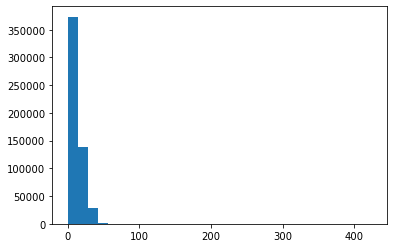

In [44]:
# Distribution of tree diameter - living trees

living = trees15[trees15['alive'] == 1].copy()

print(f"""n_0s = {len(living[living['tree_diameter'] == 0])}
""")

print(living['tree_diameter'].describe())
plt.hist(living['tree_diameter'], bins=30);

/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


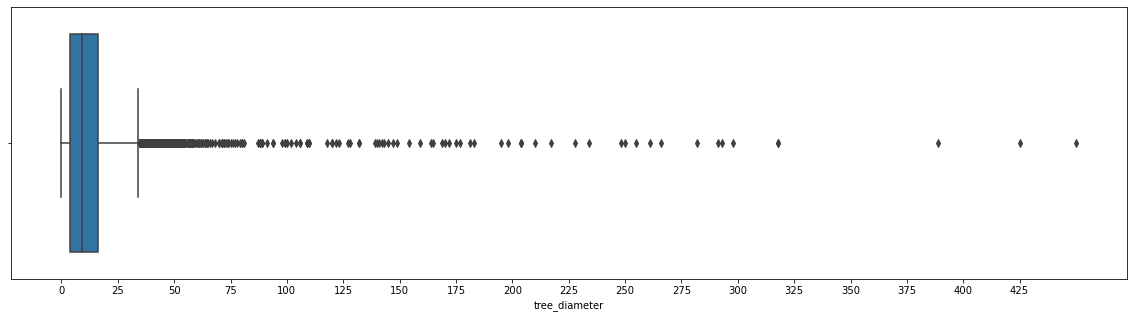

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(trees15['tree_diameter'])
plt.xticks(np.arange(0,450, 25));

In [60]:
# identify probable input error bringing max tree diameter so high

#print(f'total entries: {trees15.shape[0]}')
print(f"pct diameter >24 in: {len(trees15[trees15['tree_diameter'] > 24]) / trees15.shape[0]}") # over 24" is plausible
print(f"pct diameter >36 in: {len(trees15[trees15['tree_diameter'] > 36]) / trees15.shape[0]}") 
print(f"""pct diameter >48 in: {len(trees15[trees15['tree_diameter'] > 48]) / trees15.shape[0]} 
""")# over 48" less so

# I wonder if the errors can be traced to volunteers ?
print(trees15[trees15['tree_diameter'] > 50]['User_Type'].value_counts(normalize=True))

pct diameter >24 in: 0.09742761539841878
pct diameter >36 in: 0.010550260194010787
pct diameter >48 in: 0.0006913877365759945 

TreesCount Staff    0.480892
NYC Parks Staff     0.340764
Volunteer           0.178344
Name: User_Type, dtype: float64


In [46]:
trees15['User_Type'].value_counts(normalize=True)

TreesCount Staff    0.451898
NYC Parks Staff     0.287704
Volunteer           0.260398
Name: User_Type, dtype: float64

- Actually, fewer volunteers than the overall proportion were measuring trees with diameter over 50"

In [47]:
# Might some census takers have been reporting circumference instead of diameter?

diameters = list(range(1, 20))

circumference = [round(d * np.pi, 1) for d in diameters]
pd.Series(diameters, circumference)

3.1      1
6.3      2
9.4      3
12.6     4
15.7     5
18.8     6
22.0     7
25.1     8
28.3     9
31.4    10
34.6    11
37.7    12
40.8    13
44.0    14
47.1    15
50.3    16
53.4    17
56.5    18
59.7    19
dtype: int64

In [51]:
trees15[trees15['tree_diameter'] > 48][['tree_diameter']].value_counts().head(20)

tree_diameter
51               52
49               43
50               36
54               27
52               21
53               20
57               17
64               15
56               13
58               12
55               11
59               10
61                5
62                4
60                4
71                4
74                4
204               3
89                3
88                3
dtype: int64

- **Most of these high reported tree diameters, were they in fact circumferences, would correspond to trees with diameters within the interquartile range of the data.**
- **I'm going to drop rows with diameter over 48", as well as those reported as 0, which together comprise less than 2% of the data.**

In [30]:
trees15[trees15['tree_diameter'] > 48].sort_values('tree_diameter', ascending=False)

,year,tree_diameter,Diameter_of_Stump_Measured,tree_status,tree_health_subjective,spc_latin,spc_common,sidw_damage,User_Type,Is_Root_Stone_Present,...,est_address,zip_code,borough,council_district,nta_name,census_tract_7dig,latitude,longitude,borough_name,alive
228048,2015,450,0,Dead,None,None,none,None,TreesCount Staff,False,...,1950 LAFAYETTE AVENUE,10473,2,18,Soundview-Castle Hill-Clason Point-Harding Park,2001600,40.821953,-73.857671,Bronx,0
2405,2015,425,0,Alive,Good,Quercus bicolor,swamp white oak,1.0,NYC Parks Staff,False,...,960 STERLING PLACE,11213,3,35,Crown Heights North,3033900,40.672287,-73.946936,Brooklyn,1
180962,2015,389,0,Alive,Fair,Liriodendron tulipifera,tulip-poplar,1.0,NYC Parks Staff,False,...,136-032 220 PLACE,11413,4,31,Laurelton,4035800,40.675636,-73.750616,Queens,1
270493,2015,318,0,Alive,Good,Quercus palustris,pin oak,0.0,TreesCount Staff,False,...,1336 RIVERSIDE DRIVE,10033,1,10,Washington Heights North,1027500,40.850879,-73.943067,Manhattan,1
201195,2015,318,0,Alive,Good,Platanus x acerifolia,london planetree,0.0,NYC Parks Staff,False,...,100 NICHOLS AVENUE,11208,3,37,Cypress Hills-City Line,3118202,40.688366,-73.869641,Brooklyn,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78686,2015,51,0,Alive,Good,Platanus x acerifolia,london planetree,0.0,TreesCount Staff,True,...,1866 EAST 4 STREET,11223,3,44,Homecrest,3042200,40.604953,-73.969234,Brooklyn,1
84382,2015,51,0,Alive,Good,Tilia americana,american linden,1.0,Volunteer,True,...,82 LINDEN BOULEVARD,11226,3,40,Prospect Lefferts Gardens-Wingate,3082200,40.652246,-73.955556,Brooklyn,1
221435,2015,51,0,Alive,Good,Quercus palustris,pin oak,0.0,NYC Parks Staff,False,...,249 JEROME AVENUE,10305,5,50,Old Town-Dongan Hills-South Beach,5007000,40.592400,-74.073625,Staten Island,1
353437,2015,51,0,Alive,Good,Tilia americana,american linden,1.0,NYC Parks Staff,False,...,203-020 42 AVENUE,11361,4,19,Bayside-Bayside Hills,4146300,40.760224,-73.780377,Queens,1


In [61]:
# Drop rows where tree diam > 48" and where tree is living but diameter = 0
high_diam_index = trees15.loc[trees15['tree_diameter'] > 48].index
zero_index = living.loc[living['tree_diameter'] == 0].index

trees15.drop(high_diam_index, inplace=True)
trees15.drop(zero_index, inplace=True)

living = trees15[trees15['alive'] == 1].copy()

In [62]:
trees15.shape

(567858, 28)

In [63]:
# Save in pieces - files are large

trees15.to_csv('../gitignore/clean_tree_census2015.csv')
trees15.loc[:280000].to_csv('../data/tree_census/clean_tree_census2015_PART1.csv')
trees15.loc[280001:].to_csv('../data/tree_census/clean_tree_census2015_PART2.csv')

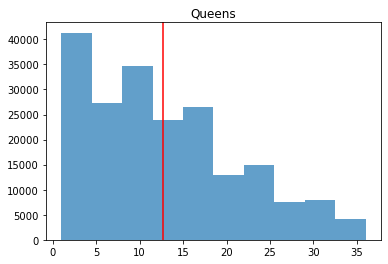

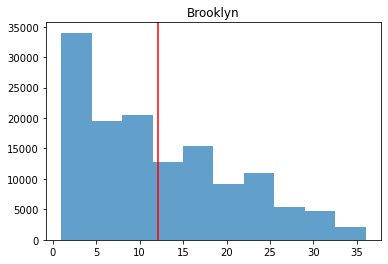

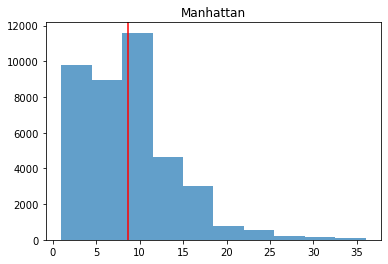

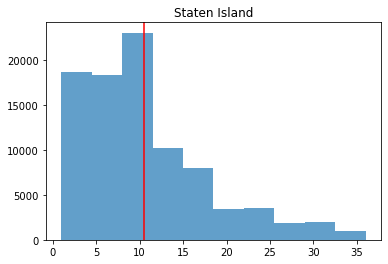

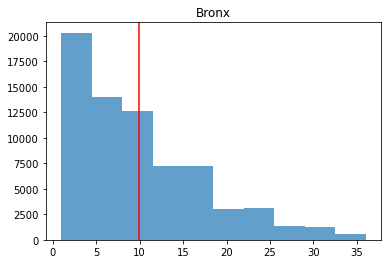

In [187]:
# Look at diameter distribution by borough
borough_names = trees15['borough_name'].unique()
for b in borough_names:
    borough_trees = living.loc[living['borough_name'] == b]
    plt.figure()
    plt.title(b)
    plt.hist(borough_trees['tree_diameter'], alpha=.7)
    plt.axvline(borough_trees['tree_diameter'].mean(), color='red')
    plt.show()

### 2005 Tree Census

In [4]:
trees05.head()

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",...,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"


In [9]:
# Drop non-matching columns in 2005 data

trees05.drop(columns=['OBJECTID', 'tree_dbh', 'tree_loc', 'pit_type', 'soil_lvl', 'vert_other', 'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 
             'horz_grate', 'horz_plant', 'horz_other', 'wire_htap', 'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard', 'inf_wires', 'inf_paving', 
             'inf_outlet', 'inf_shoes', 'inf_lights', 'inf_other', 'trunk_dmg', 'zip_city', 'cb_num', 'boroname', 'st_assem', 'st_senate', 
             'nta', 'state', 'x_sp', 'y_sp', 'objectid_1', 'census tract', 'boro_ct','council_district', 'bin', 'bbl', 'Location 1'], inplace=True)
             

# Rename columns to match 2015 data

trees05.rename(columns={
    'cen_year': 'year',
    'address': 'est_address',
    'status': 'tree_status_05',
    'sidw_crack': 'sidw_damage',
    'zipcode': 'zip_code',
    'cncldist': 'council_district',
    'borocode': 'borough',
}, inplace=True)

# Map numeric values

#trees05['tree_health'] = trees05['tree_health'].map({'Good': 2, 'Excellent': 2, 'Poor': 1, 'Dead': 0})
trees05['sidw_damage'] = trees05['sidw_damage'].map({'No': 0, 'Yes': 1})
trees05['sidw_raise'] = trees05['sidw_raise'].map({'No': 0, 'Yes': 1})

In [11]:
# Combine "sidw_damage" and "sidw_raise" into a single binary column in 2005 data

trees05['sidw_damage'] = trees05['sidw_damage'] + trees05['sidw_raise']
trees05['sidw_damage'] = trees05['sidw_damage'].map(lambda x: x if x == 0 else 1)
trees05.drop(columns='sidw_raise', inplace=True)

In [14]:
trees05['tree_status_05'].value_counts()

Good         393464
Excellent    141657
Poor          49131
Dead           8120
Name: tree_status_05, dtype: int64

In [15]:
# Add "alive" column to 2005 data

trees05['alive'] = trees05['tree_status_05'].map({'Good': 1, 'Excellent': 1, 'Poor': 1, 'Dead': 0})

In [33]:
# Clean species columns, format text to match 2015 data

# Get rid of 'crimson king'
#trees05.replace('ACER PLATANOIDES          CRIMSON KING', 'ACER PLATANOIDES', inplace=True)
#trees05.replace('MAPLE, NORWAY-CR KNG', 'MAPLE, NORWAY', inplace=True)

# Make capitalization uniform in spc_latin
def fix_latin_spec(species):
    ls = [x.lower() for x in species.split(' ')]
    ls[0] = ls[0].title()
    return ' '.join(ls)

# Make word order and caps uniform in spc_common:
def fix_common_spec(species):
    species = species.lower()
    if ',' in list(species):
        split = species.split(', ')
        first_words = ' '.join(split[1:])
        return ' '.join([first_words, split[0]])  
    else: 
        return species

trees05['spc_latin'] = trees05['spc_latin'].map(fix_latin_spec)
trees05['spc_common'] = trees05['spc_common'].map(fix_common_spec)

In [34]:
trees05.head()

,year,est_address,tree_status_05,spc_latin,spc_common,sidw_damage,zip_code,borough,nta_name,latitude,longitude,alive
0,2005,1139 57 STREET,Good,Pyrus calleryana,callery pear,0,11219,3,Borough Park,40.632653,-74.000245,1
1,2005,2220 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.620084,-73.901453,1
2,2005,2360 BERGEN AVENUE,Good,Acer platanoides crimson king,norway-cr kng maple,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.617996,-73.899111,1
3,2005,2254 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.619694,-73.901003,1
4,2005,2332 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.618323,-73.899467,1


In [36]:
trees05.shape

(592372, 12)

In [37]:
trees05[:300000].to_csv('../data/tree_census/clean_tree_census2005_PART1.csv')
trees05[300000:].to_csv('../data/tree_census/clean_tree_census2005_PART2.csv')